In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


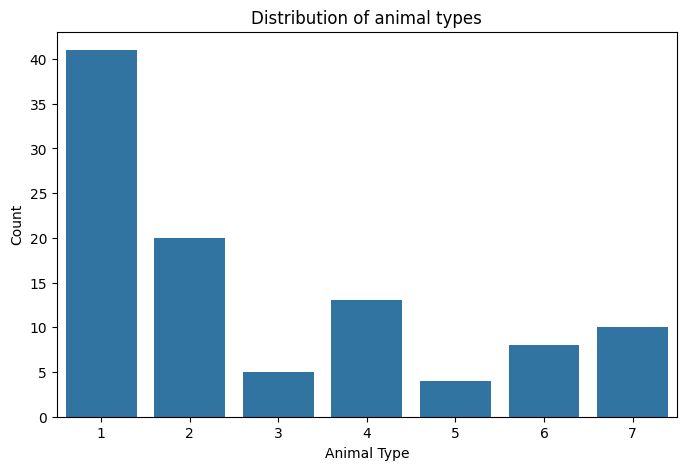

In [ ]:
# Data Analysis
#Distribution of animal types

plt.figure(figsize=(8,5))
sns.countplot(x='type', data=data)
plt.title("Distribution of animal types")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.show()

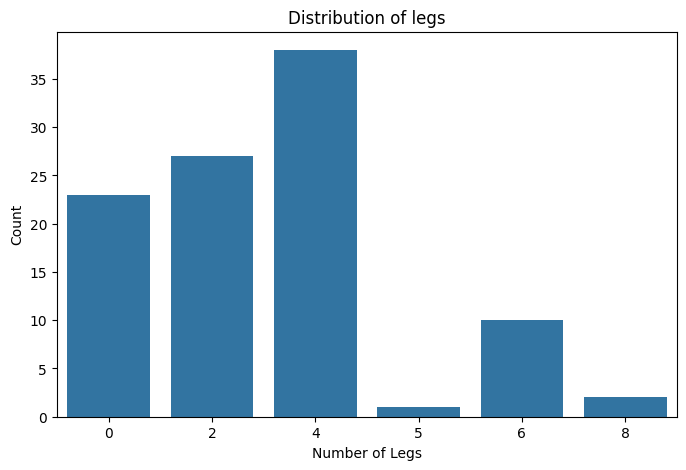

In [ ]:
#Legs Distribution

plt.figure(figsize=(8,5))
sns.countplot(x='legs',data=data)
plt.title("Distribution of legs")
plt.xlabel("Number of Legs")
plt.ylabel("Count")
plt.show()


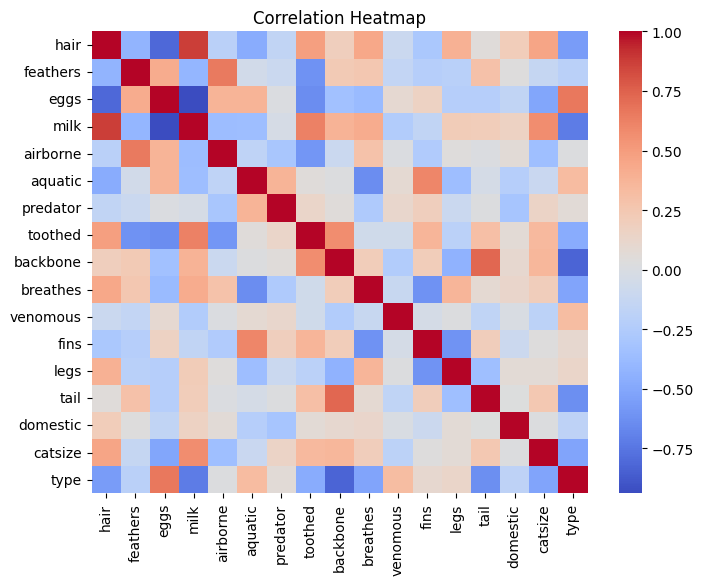

In [ ]:
#Correlation Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(data.drop(columns=['animal name']).corr(),cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

#Preprocessing
X = data.drop(columns=['animal name','type'])
y = data['type']

#Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train-Test split(80-20)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
#Train KNN Classifier(K=5,Euclidean)
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train,y_train)

#Evalution
y_pred = knn.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



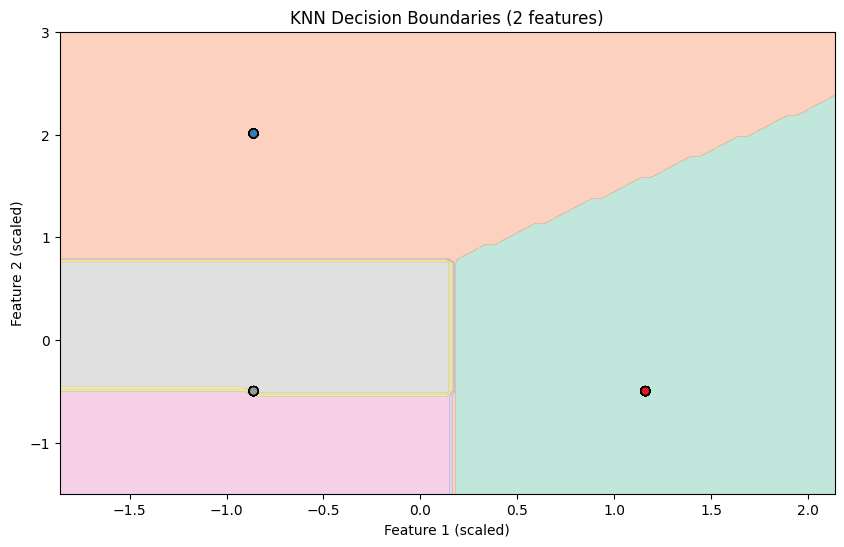

In [ ]:
# Decision Boundary Visualization
# Reduce dimensions using only 2 features (for visualization)

X_vis = X_scaled[:, :2]  # take first two features for plotting
knn_vis = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_vis.fit(X_vis, y)

# Meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap="Set2")
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, s=40, edgecolor='k', cmap="Set1")
plt.title("KNN Decision Boundaries (2 features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


**Q1. What are the key hyperparameters in KNN?**
- n_neighbors (k) ->Number of neighbours used for voting
- Metric ->Distance measure
- Weights ->uniform or distance

**Q2. What distance metrics can be used in KNN?**
- Euclidean Distance
- Manhattan Distance
- Minkowski Distance
- Cosine Similarity,Hamming Distance